<a href="https://colab.research.google.com/github/Adrianopogianeli/deep_learning_with_pyhon_sencond_edition/blob/master/chapter_2_data_representations_for_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2.2.1 Scalars: (rank-0 tensors)
import numpy as np
x = np.array(12)
x


array(12)

In [ ]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 0
number of dimension: ()


In [ ]:
#2.2.2 Vectors: (rank-1 tensors)
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 1
number of dimension: (5,)


In [ ]:
#2.2.3 Matrices (rank-2 tensors) it is 2 axes: rows and lines
x = np.array([[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]])
x

array([[ 5, 23, 22,  1,  5],
       [ 6, 34,  1,  7, 89],
       [ 7, 23, 43, 76, 32]])

In [ ]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 2
number of dimension: (3, 5)


In [ ]:
#2.2.4 Rank-3 and higher-rank tensors = it is a matrices's pack, it is 3 axes because is has 3 matrices
x = np.array([
    [[5,23,22,1,5],
      [6,34,1,7,89],
      [7,23,43,76,32]],
          [[5,23,22,1,5],
          [6,34,1,7,89],
          [7,23,43,76,32]],
             [[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]]
             ]
             )

In [ ]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 3
number of dimension: (3, 3, 5)


In [ ]:
#2.2.5 Key attributes
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#it is 3 axes because it has more than 2 matrices (rank2)
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

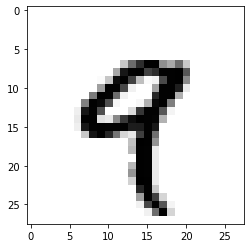

In [ ]:
# Listing 2.8 Dispaly the fourth digit of the tensor rank3
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
## print all digits of the dataset
import time
#for item in range(len(train_images)):
  #plt.imshow(train_images[item], cmap=plt.cm.binary)
  #plt.show()
  #time.sleep(2)

In [ ]:
train_labels[4]

9

In [ ]:
#2.2.6 Manipulation tensors in Numpy
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :,:]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
#select 14x14 pixes on bottom-rigth
my_slice = train_images[:,0:14,0:14]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

In [ ]:
#2.2.7 The notion of data batches
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [ ]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [ ]:
n =3
batch = train_images[128 * n: 128 * (n+1)]
batch.shape

(128, 28, 28)

In [ ]:
#2.3 Tensor operators
#keras.layers.Dense(512)
#output = relu(dot(input, w)+ b)
naive_test1 = np.array([[12,13,23],[1,4,3],[2,5,4],[3,6,5]])
naive_test2 = np.array([[12,13,23],[1,2,3],[2,3,4],[3,4,6]])

In [ ]:
#2.3.1 element-wise operations
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x

In [ ]:
#naive_test.shape
naive_relu(naive_test1)


array([[12, 13, 23],
       [ 1,  4,  3],
       [ 2,  5,  4],
       [ 3,  6,  5]])

In [ ]:
#2.3.1 element-wise operations for addition
def naive_add(x, y): # x and y are rank-2 numpy tensors
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [ ]:
naive_add(naive_test1,naive_test2)

array([[24, 26, 46],
       [ 2,  6,  6],
       [ 4,  8,  8],
       [ 6, 10, 11]])

In [ ]:
#check the diference of time between numpy and naive wise element 
import numpy as np
import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z,0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
import numpy as np
import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.11 s


In [ ]:
#2.3.2 Broadcasting
import numpy as np
x = np.random.random((32,10))
print("x = {}".format(x.shape))
y = np.random.random((10,))
print("y = {}".format(y.shape))
y = np.expand_dims(y, axis=0)
print("after expand_dim y ={}".format(y.shape))
y

x = (32, 10)
y = (10,)
after expand_dim y =(1, 10)


array([[0.37342496, 0.5026353 , 0.50226633, 0.53104451, 0.37614341,
        0.61136016, 0.89136346, 0.04197201, 0.97706738, 0.90901616]])

In [ ]:
y = np.concatenate([y] * 32, axis=0)
y.shape

(32, 10)

In [ ]:
# below the same concept but using naive implementation
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x.shape

In [ ]:
x = np.random.random((32,10))
y = np.random.random((10,))
naive_add_matrix_and_vector(x,y)

(32, 10)

In [ ]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)
z.shape

(64, 3, 32, 10)

In [ ]:
#2.3.3 Tensor product or dot product # product is the result of the multiplication
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y) # z = product
z

8.220549863740082

In [ ]:
#what does the dot operation do?
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
    #print(z)
  return z

x = np.random.random((32,))
y = np.random.random((32,))
#print(x,y)
print(naive_vector_dot(x,y))

9.935496464289528


In [ ]:
#product between a matrix and vector
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  #print('x shape ---> {}'.format(x.shape))
  #print('y shape ---> {}'.format(y.shape))
  z = np.zeros(x.shape[0])
  #print(z)
  for i in range(x.shape[0]):
    #print('proccesing the row --> {}'.format(i))
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
      #print('row_x {} is multiplied on column_y  {} --->{} * {} product = {}'.format(x[i,j],y[j],x[i, j],y[j],z[i]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,))
print(naive_matrix_vector_dot(x,y))

[7.19541759 7.10923129]


In [ ]:
#using two functions
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  #print('x shape ---> {}'.format(x.shape))
  #print('y shape ---> {}'.format(y.shape))
  z = np.zeros((x.shape[0], y.shape[1]))
  #print('z ---> {}'.format(z))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i,:] # x width 
      column_y = y[:,j] # y height
      z[i,j] = naive_vector_dot(row_x, column_y)
      #print('row_x is multiplied on column_y --->{} * {} product = {}'.format(row_x,column_y,z[i,j]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,2))
print(naive_matrix_vector_dot(x,y))

[[10.58966201  7.29972719]
 [10.69090002  9.57449848]]


In [ ]:
#product between a matrix and vector
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  print('x shape ---> {}'.format(x.shape))
  print('y shape ---> {}'.format(y.shape))
  z = np.zeros(x.shape[0])
  #print(z)
  for i in range(x.shape[0]):
    print('proccesing the row --> {}'.format(i))
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
      #print('row_x {} is multiplied on column_y  {} --->{} * {} product = {}'.format(x[i,j],y[j],x[i, j],y[j],z[i]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,))
print(naive_matrix_vector_dot(x,y))

x shape ---> (2, 32)
y shape ---> (32,)
proccesing the row --> 0
proccesing the row --> 1
[9.16615563 8.26651243]


In [ ]:
#2.3.4 Tensor reshaping
train_images = train_images.reshape((60000,28 * 28))
train_images.shape


(60000, 784)

In [ ]:
x = np.array([
    [0., 1.],
    [2.,3.],
    [4.,5.]
])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [ ]:
#2.3.5 Geometric interpretation of tensor operations
m = np.random.normal(1.0, 0.2, 10)
a = [0.5, 1]
ms = np.random.uniform(1,.2,10)
mx = np.arange(0,1,0.1)
my = mx.reshape(10,1,order='c')
#m = np.array([10,mx])
my

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9]])

In [6]:
#THE GRADIENT TAPE IN TENSORFLOW
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x)
x = tf.Variable(tf.random.uniform((2,2)))
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x)
print(grad_of_y_wrt_x)



tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [8]:
#It also works with lists of variables: 
W = tf.Variable(tf.random.uniform((2, 2))) 
b = tf.Variable(tf.zeros((2,))) 
x = tf.random.uniform((2, 2)) 
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
  grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.6332469, 0.6332469],
       [0.8961519, 0.8961519]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


In [9]:
#2.5.1 Reimplement our first example from scratch in TensorFlow
import tensorflow as tf
class NaiveDense:
  def __init__(self, input_size,output_size,activation):
    self.activation = activation

    w_shape = (input_size,output_size) #Create a matrix, W, of shape (input_size, output_size), initialized with random values.
    w_initial_value = tf.radom.uniform(w_shape, minval=0, maxval=1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape =(output_size,) #I am not sure ---> Create a vector, b, of shape (output_size,), initialized with zeros.
    b_initial_values = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_values)

  def __call__(self, inputs): #Apply the forwads pass
    return self.activation(tf.matmul(inputs,self.W) + self.b)

  @property
  def weights(self): # Convenience method for retrieving the layer’s weights
    return [self.W, self.b]